In [1]:
import pandas as pd

In [2]:
wards = pd.read_pickle("./data/ward.p")
wards.head()

ward            alderman                          address    zip
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649

In [3]:
wards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ward      50 non-null     object
 1   alderman  50 non-null     object
 2   address   50 non-null     object
 3   zip       50 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [4]:
census = pd.read_pickle("./data/census.p")
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ward      50 non-null     object
 1   pop_2000  50 non-null     int64 
 2   pop_2010  50 non-null     int64 
 3   change    50 non-null     object
 4   address   50 non-null     object
 5   zip       50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB


## Inner Join

In [5]:
wards_census = wards.merge(census, on="ward")
wards_census.head()

ward            alderman                        address_x  zip_x  pop_2000  \
0    1  Proco "Joe" Moreno        2058 NORTH WESTERN AVENUE  60647     52951   
1    2       Brian Hopkins       1400 NORTH  ASHLAND AVENUE  60622     54361   
2    3          Pat Dowell          5046 SOUTH STATE STREET  60609     40385   
3    4    William D. Burns  435 EAST 35TH STREET, 1ST FLOOR  60616     51953   
4    5  Leslie A. Hairston            2325 EAST 71ST STREET  60649     55302   

   pop_2010 change                                address_y  zip_y  
0     56149     6%              2765 WEST SAINT MARY STREET  60647  
1     55805     3%                 WM WASTE MANAGEMENT 1500  60622  
2     53039    31%                      17 EAST 38TH STREET  60653  
3     54589     5%  31ST ST HARBOR BUILDING LAKEFRONT TRAIL  60653  
4     51455    -7%  JACKSON PARK LAGOON SOUTH CORNELL DRIVE  60637

<img src="./img/innerJoin.png" alt="Inner Join" title="Inner Join"/>

In [6]:
wards_census.columns

Index(['ward', 'alderman', 'address_x', 'zip_x', 'pop_2000', 'pop_2010',
       'change', 'address_y', 'zip_y'],
      dtype='object')

## Suffixes

In [7]:
wards_census = wards.merge(census, on='ward', suffixes=('_cen', '_ward'))
print(wards_census.head(3))
print(wards_census.shape)

  ward            alderman                 address_cen zip_cen  pop_2000  \
0    1  Proco "Joe" Moreno   2058 NORTH WESTERN AVENUE   60647     52951   
1    2       Brian Hopkins  1400 NORTH  ASHLAND AVENUE   60622     54361   
2    3          Pat Dowell     5046 SOUTH STATE STREET   60609     40385   

   pop_2010 change                 address_ward zip_ward  
0     56149     6%  2765 WEST SAINT MARY STREET    60647  
1     55805     3%     WM WASTE MANAGEMENT 1500    60622  
2     53039    31%          17 EAST 38TH STREET    60653  
(50, 9)


In [8]:
taxi_owners = pd.read_pickle("./data/taxi_owners.p")
taxi_owners.head()

rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618

In [9]:
taxi_veh = pd.read_pickle("./data/taxi_vehicles.p")
taxi_veh.head()

vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO

In [10]:
taxi_ownr_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=('_ownr','_veh'))
taxi_ownr_veh.columns

Index(['rid', 'vid', 'owner_ownr', 'address', 'zip', 'make', 'model', 'year',
       'fuel_type', 'owner_veh'],
      dtype='object')

In [11]:
# Most popular fuel type
taxi_ownr_veh['fuel_type'].value_counts()

HYBRID                    2792
GASOLINE                   611
FLEX FUEL                   89
COMPRESSED NATURAL GAS      27
Name: fuel_type, dtype: int64

## One to many relationships

In [12]:
licenses = pd.read_pickle("./data/licenses.p")
licenses.head()

account ward  aid                   business               address    zip
0  307071    3  743       REGGIE'S BAR & GRILL       2105 S STATE ST  60616
1      10   10  829                 HONEYBEERS   13200 S HOUSTON AVE  60633
2   10002   14  775                CELINA DELI     5089 S ARCHER AVE  60632
3   10005   12  NaN  KRAFT FOODS NORTH AMERICA        2005 W 43RD ST  60609
4   10044   44  638  NEYBOUR'S TAVERN & GRILLE  3651 N SOUTHPORT AVE  60613

In [13]:
wards_licenses = wards.merge(licenses, on='ward', suffixes=('_ward','_licn'))
wards_licenses.shape

(10000, 9)

In [14]:
wards_licenses.head()

ward            alderman               address_ward zip_ward account  aid  \
0    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   12024  NaN   
1    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14446  743   
2    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14624  775   
3    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   14987  NaN   
4    1  Proco "Joe" Moreno  2058 NORTH WESTERN AVENUE    60647   15642  814   

               business             address_licn zip_licn  
0   DIGILOG ELECTRONICS       1038 N ASHLAND AVE    60622  
1      EMPTY BOTTLE INC   1035 N WESTERN AVE 1ST    60622  
2  LITTLE MEL'S HOT DOG    2205 N CALIFORNIA AVE    60647  
3    MR. BROWN'S LOUNGE   2301 W CHICAGO AVE 1ST    60622  
4          Beat Kitchen  2000-2100 W DIVISION ST    60622

In [15]:
# ward having most businesses
wards_licenses['ward'].value_counts()[:5]

42    1371
27     497
25     321
2      301
47     275
Name: ward, dtype: int64

In [16]:
wards.loc[wards['ward'] == '42', ['ward', 'alderman']]

ward        alderman
41   42  Brendan Reilly

In [17]:
biz_owner = pd.read_pickle("./data/business_owners.p")
biz_owner.head()

account first_name  last_name      title
0      10      PEARL    SHERMAN  PRESIDENT
1      10      PEARL    SHERMAN  SECRETARY
2   10002     WALTER     MROZEK    PARTNER
3   10002     CELINA     BYRDAK    PARTNER
4   10005      IRENE  ROSENFELD  PRESIDENT

In [18]:
# merge licences on biz_owner
licenses_biz_owner = licenses.merge(biz_owner, on='account')
licenses_biz_owner.head()

account ward  aid              business              address    zip  \
0  307071    3  743  REGGIE'S BAR & GRILL      2105 S STATE ST  60616   
1      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
2      10   10  829            HONEYBEERS  13200 S HOUSTON AVE  60633   
3   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632   
4   10002   14  775           CELINA DELI    5089 S ARCHER AVE  60632   

  first_name last_name      title  
0     ROBERT     GLICK     MEMBER  
1      PEARL   SHERMAN  PRESIDENT  
2      PEARL   SHERMAN  SECRETARY  
3     WALTER    MROZEK    PARTNER  
4     CELINA    BYRDAK    PARTNER

In [19]:
licenses_biz_owner.shape

(19497, 9)

In [20]:
# group the results by title then count the number of accounts
count_df = licenses_biz_owner.groupby('title').agg({'account':'count'})
sorted_count_df = count_df.sort_values('account', ascending=False)
sorted_count_df.head()

account
title                   
PRESIDENT           6259
SECRETARY           5205
SOLE PROPRIETOR     1658
OTHER               1200
VICE PRESIDENT       970

## Merging multiple dataframes

In [21]:
stations = pd.read_pickle("./data/stations.p")
stations.head()

station_id        station_name                 location
0      40010  Austin-Forest Park  (41.870851, -87.776812)
1      40020         Harlem-Lake  (41.886848, -87.803176)
2      40030        Pulaski-Lake  (41.885412, -87.725404)
3      40040        Quincy/Wells   (41.878723, -87.63374)
4      40050               Davis   (42.04771, -87.683543)

In [22]:
ridership = pd.read_pickle("./data/cta_ridership.p")
ridership.head()

station_id  year  month  day  rides
0      40010  2019      1    1    576
1      40010  2019      1    2   1457
2      40010  2019      1    3   1543
3      40010  2019      1    4   1621
4      40010  2019      1    5    719

In [23]:
cal = pd.read_pickle("./data/cta_calendar.p")
cal.head()

year  month  day        day_type
0  2019      1    1  Sunday/Holiday
1  2019      1    2         Weekday
2  2019      1    3         Weekday
3  2019      1    4         Weekday
4  2019      1    5        Saturday

**Goal** is to find the **total number of rides** provided to passengers *passing through the Wilson station*

`(station_name == 'Wilson')`

when riding Chicago's public transportation system *on weekdays* 

`(day_type == 'Weekday')`

*in July* `(month == 7)`

the relationship between the tables:

<img src="./img/tableRelationship.png" alt="relationship"/>

In [24]:
ridership_cal = ridership.merge(cal, on=['year', 'month', 'day']) \
                         .merge(stations, on='station_id')
ridership_cal.head()

station_id  year  month  day  rides        day_type        station_name  \
0      40010  2019      1    1    576  Sunday/Holiday  Austin-Forest Park   
1      40010  2019      1    2   1457         Weekday  Austin-Forest Park   
2      40010  2019      1    3   1543         Weekday  Austin-Forest Park   
3      40010  2019      1    4   1621         Weekday  Austin-Forest Park   
4      40010  2019      1    5    719        Saturday  Austin-Forest Park   

                  location  
0  (41.870851, -87.776812)  
1  (41.870851, -87.776812)  
2  (41.870851, -87.776812)  
3  (41.870851, -87.776812)  
4  (41.870851, -87.776812)

In [25]:
ridership_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3285 entries, 0 to 3284
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   station_id    3285 non-null   object
 1   year          3285 non-null   int64 
 2   month         3285 non-null   int64 
 3   day           3285 non-null   int64 
 4   rides         3285 non-null   int64 
 5   day_type      3285 non-null   object
 6   station_name  3285 non-null   object
 7   location      3285 non-null   object
dtypes: int64(4), object(4)
memory usage: 231.0+ KB


In [26]:
filter_criteria = ((ridership_cal['station_name'] == 'Wilson') &
                   (ridership_cal['day_type'] == "Weekday") &
                   (ridership_cal['month'] == 7))

ridership_cal.loc[filter_criteria, 'rides'].sum()

140005

* Merge licenses and zip_demo on zip; and merge the wards on ward
* Show top 10 median income by alderman

In [27]:
zip_demo = pd.read_pickle("./data/zip_demo.p")
zip_demo.head(2)

zip  income
0  60630   70122
1  60640   50488

In [28]:
licenses_zip_ward = licenses.merge(zip_demo, on='zip') \
                        .merge(wards, on='ward')
licenses_zip_ward.groupby('alderman').agg({'income':'median'}).sort_values('income', ascending=False)[:10]

income
alderman                     
Brendan Reilly         110215
William D. Burns       107811
Michelle Smith         100116
Tom Tunney              88708
Brian Hopkins           87143
Proco "Joe" Moreno      87143
Walter Burnett, Jr.     87143
Anthony V. Napolitano   82226
James Cappleman         79565
Margaret Laurino        70122

* merge land_use and census and merge result with licenses
* Group by ward, pop_2010, and vacant, then count the # of accounts

In [29]:
land_use = pd.read_pickle("./data/land_use.p")
land_use.head(2)

ward  residential  commercial  industrial  vacant  other
0    1           41           9           2       2     46
1    2           31          11           6       2     50

In [30]:
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen', '_lic'))
land_cen_lic.head(2)

ward  residential  commercial  industrial  vacant  other  pop_2000  \
0    1           41           9           2       2     46     52951   
1    1           41           9           2       2     46     52951   

   pop_2010 change                  address_cen zip_cen account  aid  \
0     56149     6%  2765 WEST SAINT MARY STREET   60647   12024  NaN   
1     56149     6%  2765 WEST SAINT MARY STREET   60647   14446  743   

              business             address_lic zip_lic  
0  DIGILOG ELECTRONICS      1038 N ASHLAND AVE   60622  
1     EMPTY BOTTLE INC  1035 N WESTERN AVE 1ST   60622

In [31]:
accounts_counts = land_cen_lic.groupby(['ward', 'pop_2010', 'vacant'],
                                       as_index=False).agg({'account':'count'})
sorted_counts = accounts_counts.sort_values(['ward', 'account', 'pop_2010'],
                                           ascending=[False, True, True])
sorted_counts.head()

ward  pop_2010  vacant  account
49    9     51519       6      101
48    8     51687       5      176
47    7     51581      19       80
46    6     52341       8      149
45   50     55809       1      168

## Left Join

<img src="./img/leftJoin.png" alt="Left Join"/>

In [32]:
movies = pd.read_pickle("./data/movies.p")
movies.head()

id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17

In [33]:
movies.shape

(4803, 4)

In [34]:
tagline = pd.read_pickle("./data/taglines.p")
tagline.head(2)

id                                         tagline
0  19995                     Enter the World of Pandora.
1    285  At the end of the world, the adventure begins.

In [35]:
tagline.shape

(3955, 2)

In [36]:
movies_tagline = movies.merge(tagline, on='id', how='left')
movies_tagline.head()

id                 title  popularity release_date  \
0    257          Oliver Twist   20.415572   2005-09-23   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12   
2  38365             Grown Ups   38.864027   2010-06-24   
3   9672              Infamous    3.680896   2006-11-16   
4  12819       Alpha and Omega   12.300789   2010-09-17   

                                           tagline  
0                                              NaN  
1             Never underestimate an overachiever.  
2  Boys will be boys. . . some longer than others.  
3          There's more to the story than you know  
4                           A Pawsome 3D Adventure

In [37]:
movies_tagline.shape

(4803, 5)

In [38]:
financials = pd.read_pickle("./data/financials.p")
financials.head(2)

id     budget       revenue
0  19995  237000000  2.787965e+09
1    285  300000000  9.610000e+08

In [39]:
financials.shape

(3229, 3)

In [40]:
movies_financials = movies.merge(financials, on='id', how='left')
movies_financials.head(2)

id                 title  popularity release_date      budget  \
0    257          Oliver Twist   20.415572   2005-09-23  50000000.0   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12         NaN   

      revenue  
0  42093706.0  
1         NaN

In [41]:
# missing values
movies_financials['budget'].isna().sum()

1574

## Other Joins

### Right Join

<img src="./img/rightJoin.png" alt="Right Join"/>

In [42]:
movies_financials_right_join = movies.merge(financials, on='id', how='right')
movies_financials_right_join.head()

id            title  popularity release_date     budget      revenue
0    257     Oliver Twist   20.415572   2005-09-23   50000000   42093706.0
1  38365        Grown Ups   38.864027   2010-06-24   80000000  271430189.0
2   9672         Infamous    3.680896   2006-11-16   13000000    1151330.0
3  12819  Alpha and Omega   12.300789   2010-09-17   20000000   39300000.0
4  49529      John Carter   43.926995   2012-03-07  260000000  284139100.0

In [43]:
movies_financials_right_join.isna().sum()

id              0
title           0
popularity      0
release_date    0
budget          0
revenue         0
dtype: int64

In [44]:
print(movies.shape)
print(financials.shape)
print(movies_financials_right_join.shape)

(4803, 4)
(3229, 3)
(3229, 6)


In [45]:
movieGenres = pd.read_pickle("./data/movie_to_genres.p")
movieGenres.head()

movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure

In [46]:
movieGenres.genre.unique()

array(['Crime', 'Comedy', 'Science Fiction', 'Action', 'Adventure',
       'Family', 'Animation', 'Romance', 'Drama', 'Music', 'Thriller',
       'Fantasy', 'War', 'Western', 'Mystery', 'History', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [47]:
tvGenre = movieGenres[movieGenres.genre == "TV Movie"]
tvGenre.head()

movie_id     genre
4998      10947  TV Movie
5994      13187  TV Movie
7443      22488  TV Movie
10061     78814  TV Movie
10790    153397  TV Movie

In [48]:
tvGenre.shape

(8, 2)

In [49]:
tv_movies = movies.merge(tvGenre, how='right', left_on='id', right_on='movie_id')
tv_movies.head()

id                      title  popularity release_date  movie_id  \
0  153397                   Restless    0.812776   2012-12-07    153397   
1   10947        High School Musical   16.536374   2006-01-20     10947   
2  231617  Signed, Sealed, Delivered    1.444476   2013-10-13    231617   
3   78814       We Have Your Husband    0.102003   2011-11-12     78814   
4  158150        How to Fall in Love    1.923514   2012-07-21    158150   

      genre  
0  TV Movie  
1  TV Movie  
2  TV Movie  
3  TV Movie  
4  TV Movie

In [50]:
tv_movies.shape

(8, 6)

### Popular genres

In [51]:
# merge data from the movies and movieGenres
print(f"movies shape: {movies.shape}")
print(f"movieGenres shape: {movieGenres.shape}")

movies shape: (4803, 4)
movieGenres shape: (12160, 2)


In [53]:
genres_movies = movieGenres.merge(movies, how='right', left_on='movie_id', right_on='id')
genre_count = genres_movies.groupby('genre').agg({'id':'count'})
genre_count

id
genre                
Action           1154
Adventure         790
Animation         234
Comedy           1722
Crime             696
Documentary       110
Drama            2297
Family            513
Fantasy           424
Foreign            34
History           197
Horror            519
Music             185
Mystery           348
Romance           894
Science Fiction   535
TV Movie            8
Thriller         1274
War               144
Western            82

In [54]:
import matplotlib.pyplot as plt

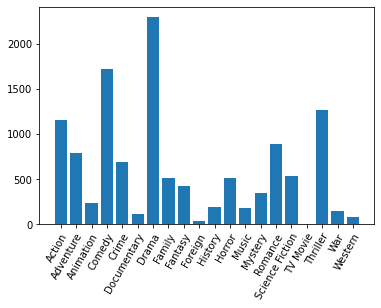

In [59]:
fig, ax = plt.subplots()
ax.bar(genre_count.index, genre_count.id )
plt.setp(ax.get_xticklabels(), rotation=60, ha='right', rotation_mode='anchor')
plt.show()

In [60]:
actor_movies = pd.read_csv("./data/actors_movies.csv")
actor_movies.head()

Actor                   Title
0  [Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...              The Matrix
1  [Hugo Weaving,Laurence Fishburne,Carrie-Anne M...     The Matrix Reloaded
2  [Hugo Weaving,Laurence Fishburne,Carrie-Anne M...  The Matrix Revolutions
3           [Al Pacino,Charlize Theron,Keanu Reeves]    The Devil's Advocate
4  [James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...          A Few Good Men

In [65]:
actor_movies.loc[actor_movies['Title'].str.contains("Matrix"), :]

Actor                   Title
0  [Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...              The Matrix
1  [Hugo Weaving,Laurence Fishburne,Carrie-Anne M...     The Matrix Reloaded
2  [Hugo Weaving,Laurence Fishburne,Carrie-Anne M...  The Matrix Revolutions

In [66]:
sequels = pd.read_pickle("./data/sequels.p")
sequels.head()

id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>

In [67]:
casts = pd.read_pickle("./data/casts.p")
casts.head()

movie_id  cast_id character  gender    id               name
7          5       22   Jezebel       1  3122        Sammi Davis
8          5       23     Diana       1  3123  Amanda de Cadenet
9          5       24    Athena       1  3124     Valeria Golino
3          5       25   Elspeth       1  3125            Madonna
12         5       26       Eva       1  3126          Ione Skye

In [68]:
# looking for batman
movies.loc[movies.title.str.contains("Batman"),:]

id                                    title  popularity release_date
310      364                           Batman Returns   59.113174   1992-06-19
354     2661                                   Batman    9.815394   1966-07-30
833      268                                   Batman   44.104469   1989-06-23
917      414                           Batman Forever   48.205606   1995-05-31
1580     272                            Batman Begins  115.040024   2005-06-10
1745  209112       Batman v Superman: Dawn of Justice  155.790452   2016-03-23
3420  142061  Batman: The Dark Knight Returns, Part 2   25.891466   2013-01-18
3793     415                           Batman & Robin   50.073575   1997-06-20

In [69]:
# casts in batman returns
batman_returns_casts = casts.loc[casts.movie_id == 364,:]
batman_returns_casts

movie_id  cast_id                        character  gender    id  \
1        364        5     Oswald Cobblepot/The Penguin       2   518   
2        364        6             Selina Kyle/Catwoman       1  1160   
3        364        7                       Max Shreck       2  4690   
4        364        8                           Alfred       2  3796   
5        364        9        Commissioner James Gordon       2  3798   
9        364       10  Mr. Cobblepot/ Penguin's Father       2  5129   
7        364       11                            Mayor       2  4776   
8        364       12                     Ice Princess       1  5130   
10       364       13  Mrs. Cobblepot/Penguin's Mother       1  5131   
0        364       22               Bruce Wayne/Batman       2  2232   
6        364       30                    Organ Grinder       2  3418   

                  name  
1         Danny DeVito  
2    Michelle Pfeiffer  
3   Christopher Walken  
4        Michael Gough  
5           Pat Hingle  
9         Paul Reubens  
7       Michael Murphy  
8       Cristi Conaway  
10      Diane Salinger  
0       Michael Keaton  
6   Vincent Schiavelli

In [70]:
batman_begins_casts = casts.loc[casts.movie_id == 272,:]
batman_begins_casts

movie_id  cast_id                           character  gender       id  \
4        272        8                          Jim Gordon       2       64   
5        272        9      Dr. Jonathan Crane / Scarecrow       2     2037   
0        272       13                Bruce Wayne / Batman       2     3894   
1        272       14                   Alfred Pennyworth       2     3895   
2        272       15                        Henri Ducard       2     3896   
..       ...      ...                                 ...     ...      ...   
85       272      185  Opera Performer Margaret - Soprano       1  1695948   
97       272      186                             Caterer       2  1695949   
90       272      187          League of Shadows Warriors       2  1695954   
45       272      188               Male Restaurant Guest       2  1695959   
17       272      189                       Crane Thug #2       2  1695960   

               name  
4       Gary Oldman  
5    Cillian Murphy  
0    Christian Bale  
1     Michael Caine  
2       Liam Neeson  
..              ...  
85    Poppy Tierney  
97  Fabio Cardascia  
90      Ruben Halse  
45     Mark Straker  
17    Kieran Hurley  

[113 rows x 6 columns]

In [74]:
# Using outer join to find out actors who did not act in both movies.

begins_returns = batman_begins_casts.merge(batman_returns_casts, on='id', how='outer',
                                           suffixes=('_beg', '_ret'))

# create an index that returns true if beg_name or name_ret are null
m = ((begins_returns.name_beg.isna()) | (begins_returns.name_ret.isna()))

begins_returns[m].head(10)

movie_id_beg  cast_id_beg                   character_beg  gender_beg  \
0         272.0          8.0                      Jim Gordon         2.0   
1         272.0          9.0  Dr. Jonathan Crane / Scarecrow         2.0   
2         272.0         13.0            Bruce Wayne / Batman         2.0   
3         272.0         14.0               Alfred Pennyworth         2.0   
4         272.0         15.0                    Henri Ducard         2.0   
5         272.0         16.0                    Rachel Dawes         1.0   
6         272.0         29.0                 Carmine Falcone         2.0   
7         272.0         31.0                      Lucius Fox         2.0   
8         272.0         32.0                           Earle         2.0   
9         272.0         33.0                    Ra's Al Ghul         2.0   

     id        name_beg  movie_id_ret  cast_id_ret character_ret  gender_ret  \
0    64     Gary Oldman           NaN          NaN           NaN         NaN   
1  2037  Cillian Murphy           NaN          NaN           NaN         NaN   
2  3894  Christian Bale           NaN          NaN           NaN         NaN   
3  3895   Michael Caine           NaN          NaN           NaN         NaN   
4  3896     Liam Neeson           NaN          NaN           NaN         NaN   
5  3897    Katie Holmes           NaN          NaN           NaN         NaN   
6   207   Tom Wilkinson           NaN          NaN           NaN         NaN   
7   192  Morgan Freeman           NaN          NaN           NaN         NaN   
8   585    Rutger Hauer           NaN          NaN           NaN         NaN   
9  3899    Ken Watanabe           NaN          NaN           NaN         NaN   

  name_ret  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
5      NaN  
6      NaN  
7      NaN  
8      NaN  
9      NaN

## Merging a table to itself

In [75]:
sequels.head()

id         title  sequel
0  19995        Avatar    <NA>
1    862     Toy Story     863
2    863   Toy Story 2   10193
3    597       Titanic    <NA>
4  24428  The Avengers    <NA>

In [76]:
sequels_merge = sequels.merge(sequels, left_on='sequel', right_on='id', suffixes=('_org', '_seq'))
sequels_merge.head()

id_org                                          title_org  sequel_org  \
0     862                                          Toy Story         863   
1     863                                        Toy Story 2       10193   
2     675          Harry Potter and the Order of the Phoenix         767   
3     121              The Lord of the Rings: The Two Towers         122   
4     120  The Lord of the Rings: The Fellowship of the Ring         121   

   id_seq                                      title_seq  sequel_seq  
0     863                                    Toy Story 2       10193  
1   10193                                    Toy Story 3        <NA>  
2     767         Harry Potter and the Half-Blood Prince        <NA>  
3     122  The Lord of the Rings: The Return of the King        <NA>  
4     121          The Lord of the Rings: The Two Towers         122

In [77]:
sequels_merge.shape

(90, 6)

### When to merge at table to itself

**Common Situations**:
* Hierarchial relationships
* Sequential relationships
* Graph data

In [78]:
crews = pd.read_pickle("./data/crews.p")
crews.head()

id  department             job               name
0  19995     Editing          Editor  Stephen E. Rivkin
2  19995       Sound  Sound Designer  Christopher Boyes
4  19995  Production         Casting          Mali Finn
6  19995   Directing        Director      James Cameron
7  19995     Writing          Writer      James Cameron

In [79]:
crew_merged = crews.merge(crews, on='id', how='inner', suffixes=('_dir', '_crew'))
crew_merged.head()

id department_dir job_dir           name_dir department_crew  \
0  19995        Editing  Editor  Stephen E. Rivkin         Editing   
1  19995        Editing  Editor  Stephen E. Rivkin           Sound   
2  19995        Editing  Editor  Stephen E. Rivkin      Production   
3  19995        Editing  Editor  Stephen E. Rivkin       Directing   
4  19995        Editing  Editor  Stephen E. Rivkin         Writing   

         job_crew          name_crew  
0          Editor  Stephen E. Rivkin  
1  Sound Designer  Christopher Boyes  
2         Casting          Mali Finn  
3        Director      James Cameron  
4          Writer      James Cameron

In [81]:
dir_filter = ((crew_merged.job_dir == "Director") & (crew_merged.job_crew != 'Director'))
cols_of_interest = ['id', 'job_dir', 'name_dir', 'job_crew', 'name_crew']
dir_crew = crew_merged.loc[dir_filter, cols_of_interest]
dir_crew.head()

id   job_dir       name_dir        job_crew          name_crew
156  19995  Director  James Cameron          Editor  Stephen E. Rivkin
157  19995  Director  James Cameron  Sound Designer  Christopher Boyes
158  19995  Director  James Cameron         Casting          Mali Finn
160  19995  Director  James Cameron          Writer      James Cameron
161  19995  Director  James Cameron    Set Designer    Richard F. Mays

In [82]:
dir_editor = dir_crew.loc[dir_crew.job_crew == "Editor", :]
dir_editor.head()

id   job_dir        name_dir job_crew          name_crew
156    19995  Director   James Cameron   Editor  Stephen E. Rivkin
2706     285  Director  Gore Verbinski   Editor  Stephen E. Rivkin
8669   49529  Director  Andrew Stanton   Editor    Eric Zumbrunnen
11179  38757  Director    Byron Howard   Editor        Tim Mertens
11233  38757  Director    Nathan Greno   Editor        Tim Mertens

In [83]:
# most popular editor
dir_editor.groupby('name_crew').agg({"id":"count"}).sort_values('id', ascending=False).head()

id
name_crew            
Mathilde Bonnefoy  22
Alex Rodríguez     22
Hisako Suwa        21
Stan Collet        21
Suzy Elmiger       13

In [84]:
dir_editor.shape

(1610, 5)

In [85]:
dir_editor_movies = dir_editor.merge(movies, on='id', how='left')
dir_editor_movies.head()

id   job_dir        name_dir job_crew          name_crew  \
0  19995  Director   James Cameron   Editor  Stephen E. Rivkin   
1    285  Director  Gore Verbinski   Editor  Stephen E. Rivkin   
2  49529  Director  Andrew Stanton   Editor    Eric Zumbrunnen   
3  38757  Director    Byron Howard   Editor        Tim Mertens   
4  38757  Director    Nathan Greno   Editor        Tim Mertens   

                                      title  popularity release_date  
0                                    Avatar  150.437577   2009-12-10  
1  Pirates of the Caribbean: At World's End  139.082615   2007-05-19  
2                               John Carter   43.926995   2012-03-07  
3                                   Tangled   48.681969   2010-11-24  
4                                   Tangled   48.681969   2010-11-24